<a href="https://colab.research.google.com/github/kushiraj18/DATA-ANALYSIS-USING-PYTHON/blob/main/2203A52030_DAUP_LAB_ASSIGNMENT_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import os
path = kagglehub.dataset_download("marusagar/bank-customer-attrition-insights")
print("Path to dataset files:", path)
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Stop after the first CSV file is found
# Read the CSV file
a = pd.read_csv(csv_file_path)
a.head()

100%|██████████| 307k/307k [00:00<00:00, 39.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/marusagar/bank-customer-attrition-insights/versions/1


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


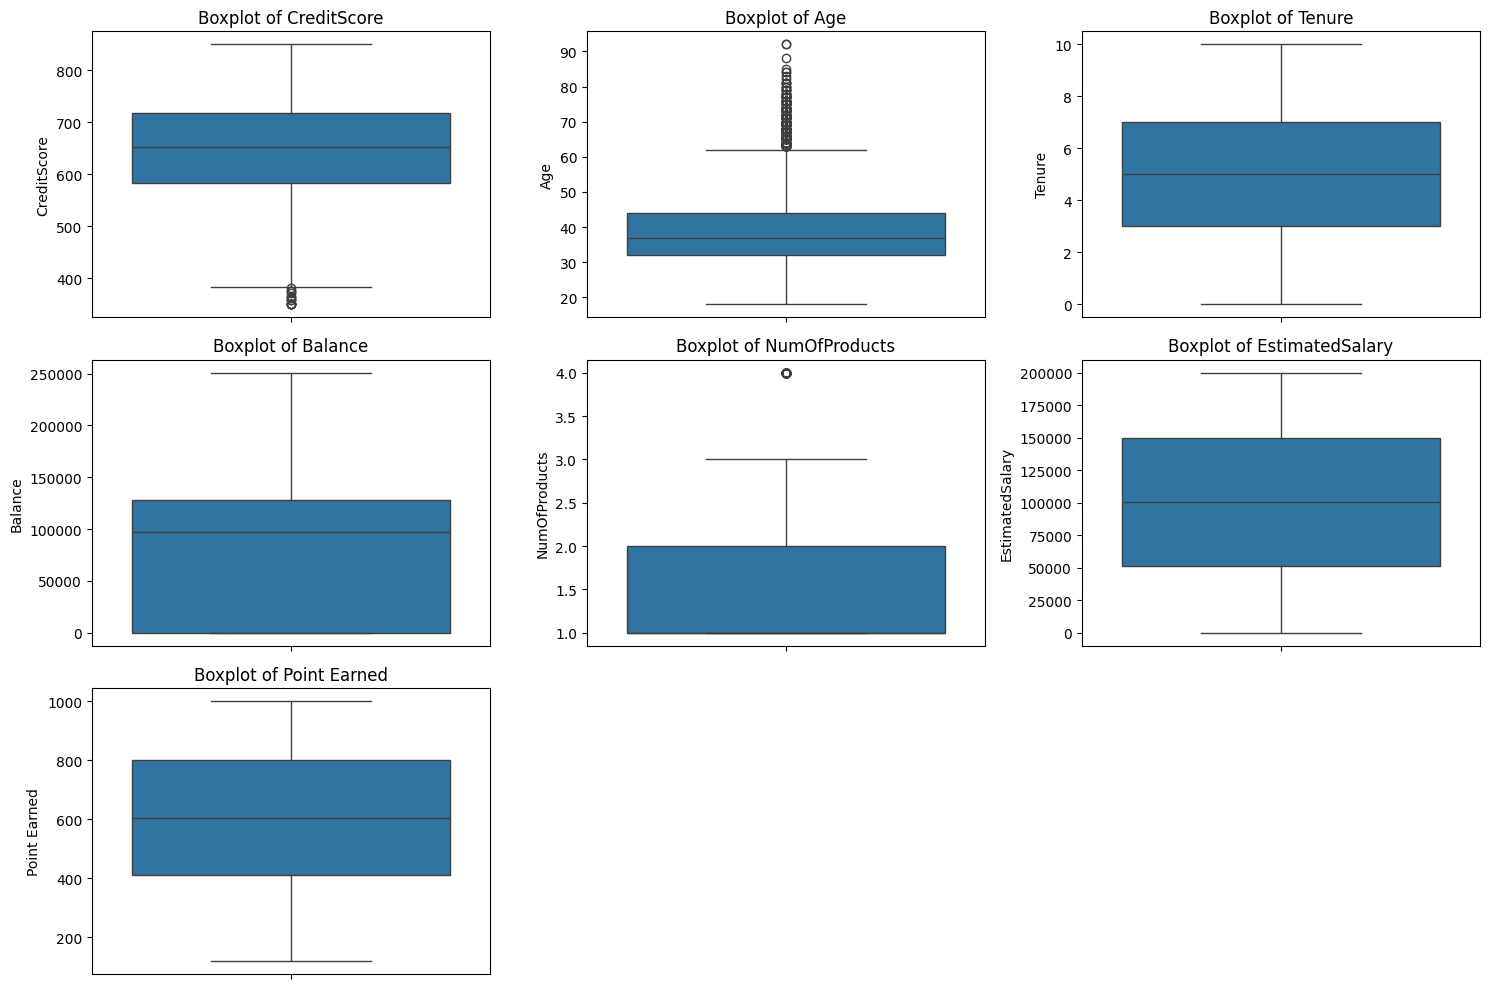

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
                  "EstimatedSalary", "Point Earned"]

# Plot box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=a[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [3]:
# Function to remove outliers using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Create a copy of dataset before removing outliers
cleaned_data = a.copy()

# Remove outliers for each numerical column
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
                  "EstimatedSalary", "Point Earned"]

for col in numerical_cols:
    cleaned_data = remove_outliers(cleaned_data, col)

print("Data shape after removing outliers:", cleaned_data.shape)


Data shape after removing outliers: (9568, 18)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy and give it the alias np

def apply_snot(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers instead of removing them
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

# Drop irrelevant columns
a = a.drop(["RowNumber", "CustomerId", "Surname"], axis=1, errors='ignore')

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ["Geography", "Gender", "Card Type"]
for col in categorical_cols:
    a[col] = encoder.fit_transform(a[col])

# Apply SNOT to numerical columns
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]
for col in numerical_cols:
    a = apply_snot(a, col)

# Define features and target
X = a.drop("Exited", axis=1)
y = a["Exited"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# SVM Model with outliers
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm_outliers = svm_model.predict(X_test_scaled)

# Random Forest Model with outliers
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_outliers = rf_model.predict(X_test)

print("\nSVM Model Performance (With Outliers):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_outliers))
print(classification_report(y_test, y_pred_svm_outliers))

print("\nRandom Forest Model Performance (With Outliers):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_outliers))
print(classification_report(y_test, y_pred_rf_outliers))


SVM Model Performance (With Outliers):
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Random Forest Model Performance (With Outliers):
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [6]:
# Create a copy of dataset before removing outliers
cleaned_data = a.copy()

# Remove outliers for each numerical column
numerical_cols = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts",
                  "EstimatedSalary", "Point Earned"]

for col in numerical_cols:
    cleaned_data = remove_outliers(cleaned_data, col)

# Re-fit the encoder on the cleaned data for each categorical column
categorical_cols = ["Geography", "Gender", "Card Type"]
for col in categorical_cols:
    # Create a new LabelEncoder for each column
    encoder = LabelEncoder()
    # Fit and transform on the cleaned data
    cleaned_data[col] = encoder.fit_transform(cleaned_data[col])

# Define features and target for cleaned data
X_cleaned = cleaned_data.drop("Exited", axis=1)
y_cleaned = cleaned_data["Exited"]

# Split into training and test sets (80% train, 20% test) for cleaned data
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Standardize features for cleaned data (for SVM)
X_train_cleaned_scaled = scaler.fit_transform(X_train_cleaned)
X_test_cleaned_scaled = scaler.transform(X_test_cleaned)

In [7]:
# Train SVM and Random Forest after removing outliers

# SVM Model without outliers
svm_model.fit(X_train_cleaned_scaled, y_train_cleaned)
y_pred_svm_cleaned = svm_model.predict(X_test_cleaned_scaled)

# Random Forest Model without outliers
rf_model.fit(X_train_cleaned, y_train_cleaned)
y_pred_rf_cleaned = rf_model.predict(X_test_cleaned)

# Print performance metrics after removing outliers
print("\nSVM Model Performance (Without Outliers):")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_svm_cleaned))
print(classification_report(y_test_cleaned, y_pred_svm_cleaned))

print("\nRandom Forest Model Performance (Without Outliers):")
print("Accuracy:", accuracy_score(y_test_cleaned, y_pred_rf_cleaned))
print(classification_report(y_test_cleaned, y_pred_rf_cleaned))



SVM Model Performance (Without Outliers):
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Random Forest Model Performance (Without Outliers):
Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



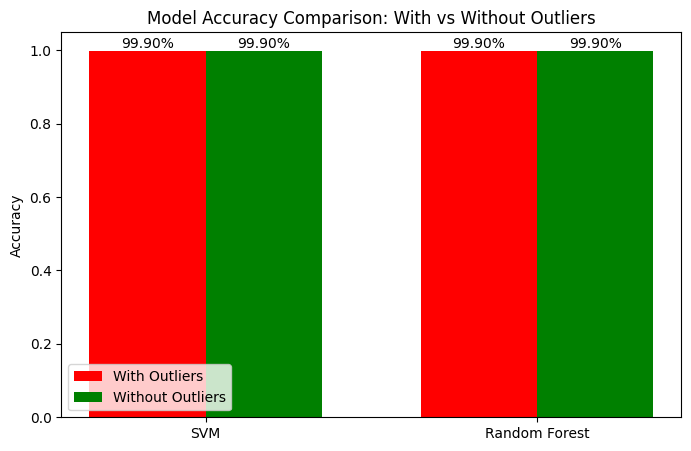

In [8]:
import numpy as np
# Store accuracy results
svm_acc_with = accuracy_score(y_test, y_pred_svm_outliers)
svm_acc_without = accuracy_score(y_test_cleaned, y_pred_svm_cleaned)
rf_acc_with = accuracy_score(y_test, y_pred_rf_outliers)
rf_acc_without = accuracy_score(y_test_cleaned, y_pred_rf_cleaned)

# Create bar plot
labels = ['SVM', 'Random Forest']
with_outliers = [svm_acc_with, rf_acc_with]
without_outliers = [svm_acc_without, rf_acc_without]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, with_outliers, width, label='With Outliers', color='red')
rects2 = ax.bar(x + width/2, without_outliers, width, label='Without Outliers', color='green')

# Labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison: With vs Without Outliers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display values on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2%}', ha='center', va='bottom')

plt.show()
